In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mock0_dat = np.load('/global/cfs/cdirs/desi/users/mpinon/power_spectra/power_spectrum_mock0_LRG_complete_SGC.npy',allow_pickle=True)
mock0_dat = deepcopy(mock0_dat[()]['poles'])
# mock0_dat_poles = mock0_dat

In [3]:
mock0_dat.keys()

dict_keys(['name', 'edges', 'modes', 'power_nonorm', 'power_zero_nonorm', 'power_direct_nonorm', 'nmodes', 'wnorm', 'shotnoise_nonorm', 'attrs', 'ells'])

In [4]:
# kdat = mock0_dat['modes']
kdat = mock0_dat['modes'][0]
# mock0_dat['power_nonorm'][2]
# kdat[1:]-kdat[:-1]

In [5]:
P0 = np.real(mock0_dat['power_nonorm'][0])
P2 = np.real(mock0_dat['power_nonorm'][1])
P4 = np.real(mock0_dat['power_nonorm'][2])

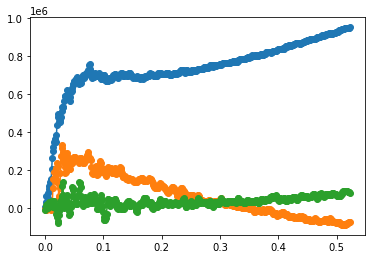

In [6]:
plt.plot(kdat,kdat*P0,'o-')
plt.plot(kdat,kdat*P2,'o-')
plt.plot(kdat,kdat*P4,'o-')
plt.show()

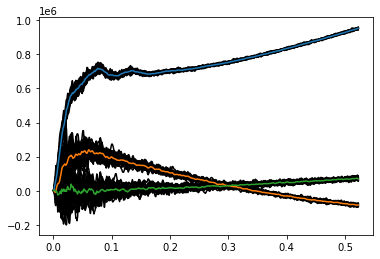

In [7]:
P0_all = np.zeros((len(kdat),25))
P2_all = np.zeros((len(kdat),25))
P4_all = np.zeros((len(kdat),25))
for i in range(25):
    # print(i)
    dat = np.load('/global/cfs/cdirs/desi/users/mpinon/power_spectra/power_spectrum_mock{}_LRG_complete_SGC.npy'.format(i),allow_pickle=True)
    dat = deepcopy(dat[()]['poles'])
    P0 = np.real(dat['power_nonorm'][0])
    P2 = np.real(dat['power_nonorm'][1])
    P4 = np.real(dat['power_nonorm'][2])
    
    P0_all[:,i] = P0
    P2_all[:,i] = P2
    P4_all[:,i] = P4
    
    plt.plot(kdat,kdat*P0,'k-')
    plt.plot(kdat,kdat*P2,'k-')
    plt.plot(kdat,kdat*P4,'k-')
    
    
    
P0_mean = np.mean(P0_all,axis=1)
P2_mean = np.mean(P2_all,axis=1)
P4_mean = np.mean(P4_all,axis=1)

plt.plot(kdat,kdat*P0_mean,'C0-')
plt.plot(kdat,kdat*P2_mean,'C1-')
plt.plot(kdat,kdat*P4_mean,'C2-')
# np.shape(P0_mean),len(kdat)
plt.show()

In [19]:
wm0 = np.load('/global/cfs/cdirs/desi/users/mpinon/windows/wm_mock0_LRG_complete_NGC.npy',allow_pickle=True)[()]['value']
kin = np.load('/global/cfs/cdirs/desi/users/mpinon/windows/wm_mock0_LRG_complete_NGC.npy',allow_pickle=True)[()]
# np.shape(wm0),3*len(kdat)
len(np.array(kin['xout']).flatten())

1569

In [21]:
# kin['xout']

In [9]:
# np.load('/global/cfs/cdirs/desi/users/mpinon/windows/wm_mock0_LRG_complete_NGC.npy',allow_pickle=True)[()]
test = deepcopy(P0)
test = np.concatenate((test,P2))
test = np.concatenate((test,P4))
np.shape(test)

(1569,)

In [10]:
np.shape(np.matmul(wm0,test))

(23289,)

array([[ 1.73688748e-06,  7.08666125e-07,  2.07450017e-07, ...,
         1.10941784e-14, -5.08880980e-15, -4.37626362e-15],
       [ 3.47915284e-06,  1.41960872e-06,  4.15568606e-07, ...,
         2.23519869e-14, -1.06636445e-14, -8.28079142e-15],
       [ 3.49012320e-06,  1.42416766e-06,  4.16905353e-07, ...,
         2.22783640e-14, -1.02193353e-14, -8.78746939e-15],
       ...,
       [ 3.06336011e-09,  6.00649796e-09,  1.52171564e-08, ...,
        -2.43728663e-10,  9.46514868e-10, -9.93531802e-10],
       [-3.05694313e-09, -5.99391711e-09, -1.51852793e-08, ...,
         2.43207609e-10, -9.44523494e-10,  9.91453765e-10],
       [ 3.05058266e-09,  5.98144780e-09,  1.51536852e-08, ...,
        -2.42686689e-10,  9.42548076e-10, -9.89397802e-10]])